Usaremos máquinas de soporte vectorial para determinar si un paciente tiene o no enfermedad en el corazón. Utilizaremos los datos en [heart disease](https://archive.ics.uci.edu/ml/datasets/Heart+Disease) que se encuentran en el [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php).

*ENTREGADO POR: GINA MARITZA MARTINEZ LOPEZ*

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as colors
from sklearn.model_selection import train_test_split 
from sklearn import preprocessing 
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import PCA 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import svm

In [2]:
SEED = 42 #Semilla aleaoria

In [3]:
df=pd.read_csv('HeartDisease.csv')

In [4]:
df.head()

,Unnamed: 0,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


A continuación un resumen de los atributos de este conjunto de datos:

- **age**,
- **sex**,
- **cp**, chest pain
- **restbp**, resting blood pressure (in mm Hg)
- **chol**, serum cholesterol in mg/dl
- **fbs**, fasting blood sugar
- **restecg**, resting electrocardiographic results
- **thalach**,  maximum heart rate achieved
- **exang**, exercise induced angina
- **oldpeak**, ST depression induced by exercise relative to rest
- **slope**, the slope of the peak exercise ST segment.
- **ca**, number of major vessels (0-3) colored by fluoroscopy
- **thal**, this is short of thalium heart scan.
- **hd**, diagnosis of heart disease, the predicted attribute

Dado que las máquinas de soporte vectorial no aceptan valores faltantes, debemos asegurarnos de que no los haya. En este caso, el porcentaje de datos faltantes consiste en aquellos que tienen una interrogación "?" en las columnas 'ca' y 'thal'.

In [5]:
df = df.loc[(df['ca'] != '?') & (df['thal'] != '?')]

In [6]:
df

,Unnamed: 0,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3


Realizar One hot enconding para las columnas 'cp', 'restecg', 'slope' y 'thal'.

In [7]:
#TODO One-Hot encoding
df_ohe = pd.get_dummies(
    data=df,
    columns=["cp","restecg","slope","thal"],
    prefix=["c", "r","s","t"]
)

In [8]:
df_ohe

,Unnamed: 0,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,...,c_4.0,r_0.0,r_1.0,r_2.0,s_1.0,s_2.0,s_3.0,t_3.0,t_6.0,t_7.0
0,0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,...,0,0,0,1,0,0,1,0,1,0
1,1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,...,1,0,0,1,0,1,0,1,0,0
2,2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,...,1,0,0,1,0,1,0,0,0,1
3,3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,...,0,1,0,0,0,0,1,1,0,0
4,4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,...,0,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,297,57.0,0.0,140.0,241.0,0.0,123.0,1.0,0.2,0.0,...,1,1,0,0,0,1,0,0,0,1
298,298,45.0,1.0,110.0,264.0,0.0,132.0,0.0,1.2,0.0,...,0,1,0,0,0,1,0,0,0,1
299,299,68.0,1.0,144.0,193.0,1.0,141.0,0.0,3.4,2.0,...,1,1,0,0,0,1,0,0,0,1
300,300,57.0,1.0,130.0,131.0,0.0,115.0,1.0,1.2,1.0,...,1,1,0,0,0,1,0,0,0,1


Dado que la columna objetivo tiene más de dos categorías y vamos a realizar clasificación binaria, la convertiremos en una variable con dos clases: aquellos con valores mayores que cero los clasificaremos como 1, y los que tengan valor cero los dejamos como están.


In [9]:
#TODO Modificar la columna objetivo para que tenga dos clases
df.loc[df['hd'] != 0] = 1
df

,Unnamed: 0,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1,1
2,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1,1
3,3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1,1
298,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1,1
299,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1,1
300,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1,1


Para el algoritmo de Máquina de Soporte Vectorial es conveniente que los datos estén estandarizados. Puede hacer uso de StandardScaler de SKlearn.

**Ojo:** En esta ocasión realizaremos estandarizaciones independientes para X_train y X_test, debido a que el conjunto de conviene que el conjunto de testeo no contenga ningún tipo de información sobre el train set.

In [10]:
X=df.drop('hd',axis=1)
y=df['hd']
X


,Unnamed: 0,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1
2,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1
3,3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1
298,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1
299,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1
300,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, shuffle=True, random_state= SEED)


In [12]:
#TODO Estandarizar de manera independiente el conjunto X_train y el conjunto X_test
scaler = preprocessing.StandardScaler().fit(X_train)
scaler_train=scaler.transform(X_train)
scaler_test = scaler.transform(X_test)

Entrenar un clasificador de Máquina de Soporte Vectorial de SKLearn. Ver [documentación](https://scikit-learn.org/stable/modules/svm.html) de ser necesario.

In [13]:
#TODO Entrenar SVM con nuestro conjunto de entrenamiento.

clf= svm.SVC()
clf.fit(scaler_train,y_train)
clf.support_vectors_


array([[ 8.49033913e-01,  6.56628888e-01,  5.32200145e-01,
         3.92096568e-03,  4.91272255e-01,  5.27469497e-01,
         8.80908622e-01, -1.33530070e+00,  9.05631101e-01,
        -1.12485827e+00, -1.30269604e+00, -4.87336697e-01,
        -1.01109761e+00,  2.37205734e+00],
       [ 1.12095844e+00,  5.06812225e-01,  5.32200145e-01,
         8.74375347e-01,  7.83541137e-01,  8.65381302e-01,
         8.80908622e-01, -1.33530070e+00,  1.38450185e+00,
        -1.12485827e+00,  2.46637805e-02,  3.44679954e+00,
        -1.01109761e+00,  2.37205734e+00],
       [ 2.00994245e+00,  1.40571220e+00,  5.32200145e-01,
         1.74482973e+00,  1.39884405e+00,  7.71080333e-01,
        -1.13519152e+00,  1.42225052e+00,  6.78797587e-01,
        -1.12485827e+00,  2.51346344e+00, -4.87336697e-01,
        -1.01109761e+00,  1.83960362e+00],
       [ 1.04774799e+00,  9.18808048e-01,  5.32200145e-01,
         8.74375347e-01,  9.37366865e-01,  9.12531787e-01,
         8.80908622e-01,  1.42225052e+00,  1.

La **matriz de confusión** es una pequeña matriz que nos indica la cantidad de datos bien clasificados en cada una de las categorías. Observar el gráfico que se porduce a continuación. La matriz en este caso contrasta, por ejemplo, la cantidad **predichas** por el modelo como pacientes con o sin enfermedad con las cantidades de pacientes **etiquetados** realmente con o sin enfermedad del corazón. (Más adelante discuturemos más sobre la matriz de confusión y otras métricas).

c:\Users\Gina\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


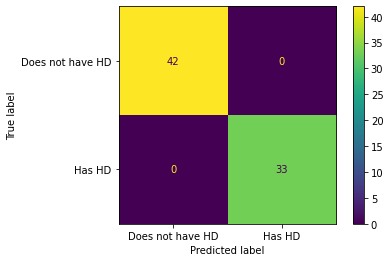

In [14]:
plot_confusion_matrix(clf, 
                      scaler_test, 
                      y_test, 
                      display_labels=["Does not have HD", "Has HD"])

TO DO: De acuerdo a la matriz anterior, cuál fue el accuracy de éste modelo? ¿Qué porcentaje de pacientes **sin** enfermedad de corazón quedaron bién clasificados? ¿Qué porcentaje de pacientes **con** enfermedad del corazón quedaron bién clasificados? 

En la matriz anterior el accuracy es del 100% del modelo presentado. El porcentaje de pacientes sin enfermedad de corazón bien clasificado es del 100% y de la misma manera los pacientes con enfermedad de corazón esta bien clasificado el 100%.

Veamos si podemos mejorar estas métricas cambiando los hiperparámetros del modelo. Para esto utilizaremos GridSearch, para encontrar la mejor combinación de hiperparámetros 'C' y 'gamma'. Usaremos Kernel radial (RBF).

In [15]:
num_features = np.size(scaler_train, axis=1)
param_grid = [
  {'C': [1, 10, 100, 1000], 
   'gamma': [1/num_features, 1, 0.1, 0.01, 0.001, 0.0001], 
   'kernel': ['rbf']},
]


optimal_params = GridSearchCV(
        SVC(), 
        param_grid,
        cv=5,
        scoring='roc_auc',
        verbose=0 
    )

optimal_params.fit(scaler_train, y_train)
print(optimal_params.best_params_)

{'C': 1, 'gamma': 0.07142857142857142, 'kernel': 'rbf'}


Observe qué parametros se obtunvieron como óptimos entre los rangos seleccionados. A continuación utilicemos dichos parámetros para ver si mejoran los porcentajes.

In [16]:
#TODO Entrenar un SVM con los parámetros óptimos. GRaficar la matriz de confusión y comparar
clf2= svm.SVC(C=1, gamma= 0.07142857142857142, kernel= 'rbf')
clf2.fit(scaler_train,y_train)
clf2.support_vectors_

array([[ 8.49033913e-01,  6.56628888e-01,  5.32200145e-01,
         3.92096568e-03,  4.91272255e-01,  5.27469497e-01,
         8.80908622e-01, -1.33530070e+00,  9.05631101e-01,
        -1.12485827e+00, -1.30269604e+00, -4.87336697e-01,
        -1.01109761e+00,  2.37205734e+00],
       [ 1.12095844e+00,  5.06812225e-01,  5.32200145e-01,
         8.74375347e-01,  7.83541137e-01,  8.65381302e-01,
         8.80908622e-01, -1.33530070e+00,  1.38450185e+00,
        -1.12485827e+00,  2.46637805e-02,  3.44679954e+00,
        -1.01109761e+00,  2.37205734e+00],
       [ 2.00994245e+00,  1.40571220e+00,  5.32200145e-01,
         1.74482973e+00,  1.39884405e+00,  7.71080333e-01,
        -1.13519152e+00,  1.42225052e+00,  6.78797587e-01,
        -1.12485827e+00,  2.51346344e+00, -4.87336697e-01,
        -1.01109761e+00,  1.83960362e+00],
       [ 1.04774799e+00,  9.18808048e-01,  5.32200145e-01,
         8.74375347e-01,  9.37366865e-01,  9.12531787e-01,
         8.80908622e-01,  1.42225052e+00,  1.

c:\Users\Gina\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


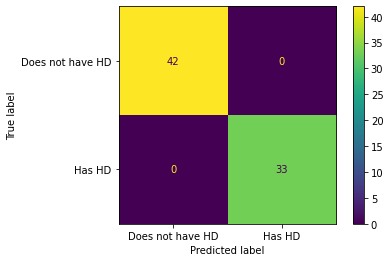

In [17]:
plot_confusion_matrix(clf2, 
                      scaler_test, 
                      y_test, 
                      display_labels=["Does not have HD", "Has HD"])

Para este modelo se evidencia tambien una precisión del 100% para el modelo.

Queremos visualizar el resultado de entrenad un clasificador de Máquina de soporte vectorial. Sin embargo nuestros datos están en una dimensión que no podemos visualizar. Es por eso que haremos una reducción de la dimensionalidad de nuestros datos mediante un método llamado Principal Component Analysis (en el cual ahondaremos más adelante).

In [18]:
pca = PCA() 
X_train_pca = pca.fit_transform(scaler_train)

A continuación entrenaremos nuevamente un clasificador de SVM para nuestros datos con dimensión reducida, demanera que podamos visualizar la clasificación. Primero encontramos los parámetros óptimos

In [19]:
train_pc1_coords = X_train_pca[:, 0] 
train_pc2_coords = X_train_pca[:, 1]


## pc1 contiene las coordenadas del eje x, después de aplicar PCA.
## pc2 contiene las coordenadas del eje y, después de aplicar PCA.

## Ahora centramos y escalamos los datos.
pca_train_scaled = preprocessing.scale(np.column_stack((train_pc1_coords, train_pc2_coords)))

## Optimizamos los hiperparámetros con los datos luego de la reducción de dimensión

num_features = np.size(pca_train_scaled, axis=1)
param_grid = [
  {'C': [1, 10, 100, 1000], 
   'gamma': [1/num_features, 1, 0.1, 0.01, 0.001, 0.0001], 
   'kernel': ['rbf']},
]

optimal_params = GridSearchCV(
        SVC(), 
        param_grid,
        cv=5,
        scoring='roc_auc', 
        verbose=0 
    )

optimal_params.fit(pca_train_scaled, y_train)
print(optimal_params.best_params_)

{'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}


Finalmente entrenamos nuestro clasificador con los parámetros óptimos y visualizamos su trabajo.

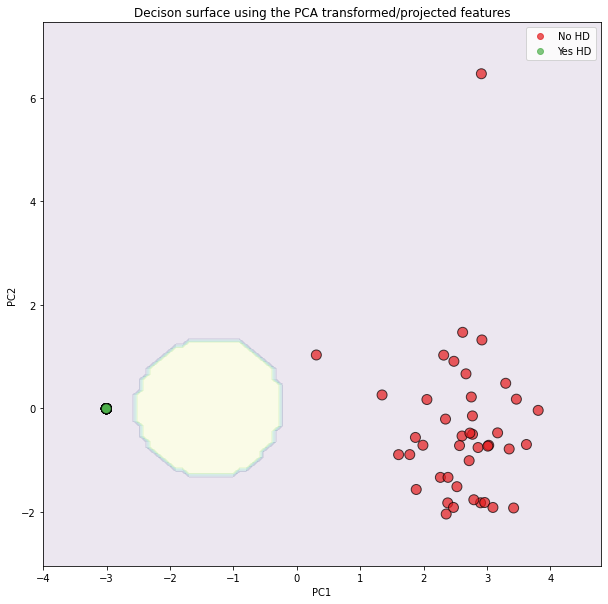

In [20]:
clf_svm = SVC(random_state=42, C=1, gamma=0.5) #Completar
clf_svm.fit(pca_train_scaled, y_train)

X_test_pca = pca.transform(scaler_test)
test_pc1_coords = X_test_pca[:, 0] 
test_pc2_coords = X_test_pca[:, 1]

x_min = test_pc1_coords.min() - 1
x_max = test_pc1_coords.max() + 1

y_min = test_pc2_coords.min() - 1
y_max = test_pc2_coords.max() + 1

xx, yy = np.meshgrid(np.arange(start=x_min, stop=x_max, step=0.1),
                     np.arange(start=y_min, stop=y_max, step=0.1))


Z = clf_svm.predict(np.column_stack((xx.ravel(), yy.ravel())))

Z = Z.reshape(xx.shape)

fig, ax = plt.subplots(figsize=(10,10))

ax.contourf(xx, yy, Z, alpha=0.1)


cmap = colors.ListedColormap(['#e41a1c', '#4daf4a'])


scatter = ax.scatter(test_pc1_coords, test_pc2_coords, c=y_test, 
               cmap=cmap, 
               s=100, 
               edgecolors='k',
               alpha=0.7)

legend = ax.legend(scatter.legend_elements()[0], 
                   scatter.legend_elements()[1],
                    loc="upper right")
legend.get_texts()[0].set_text("No HD")
legend.get_texts()[1].set_text("Yes HD")


ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_title('Decison surface using the PCA transformed/projected features')

plt.show()

Al reducir la dimensionalidad se pierde mucha información, por esta razón hay menos precisión.